In [7]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:

# Cargar el conjunto de datos Wine
wine_data = load_wine()

# Crear un DataFrame de pandas para facilitar el manejo de los datos
df_wine = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Añadir la columna de etiquetas de clase al DataFrame
df_wine['target'] = wine_data.target

# Mostrar las primeras filas del DataFrame para verificar la carga de datos
print(df_wine.head())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

## 1. Exploración de Datos

* Primero, realizaremos una exploración de los datos para entender mejor la estructura y las características del conjunto de datos Wine.

Explicación:

* info(): Proporciona información sobre el tipo de datos y la cantidad de valores no nulos en cada columna.
* describe(): Muestra estadísticas descriptivas como la media, la desviación estándar, y los percentiles para las variables numéricas.
* countplot(): Muestra la distribución de las clases en el conjunto de datos.
* heatmap(): Visualiza la correlación entre las diferentes características del conjunto de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

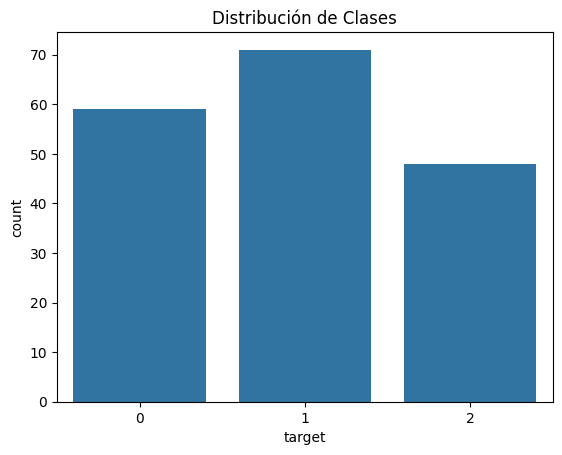

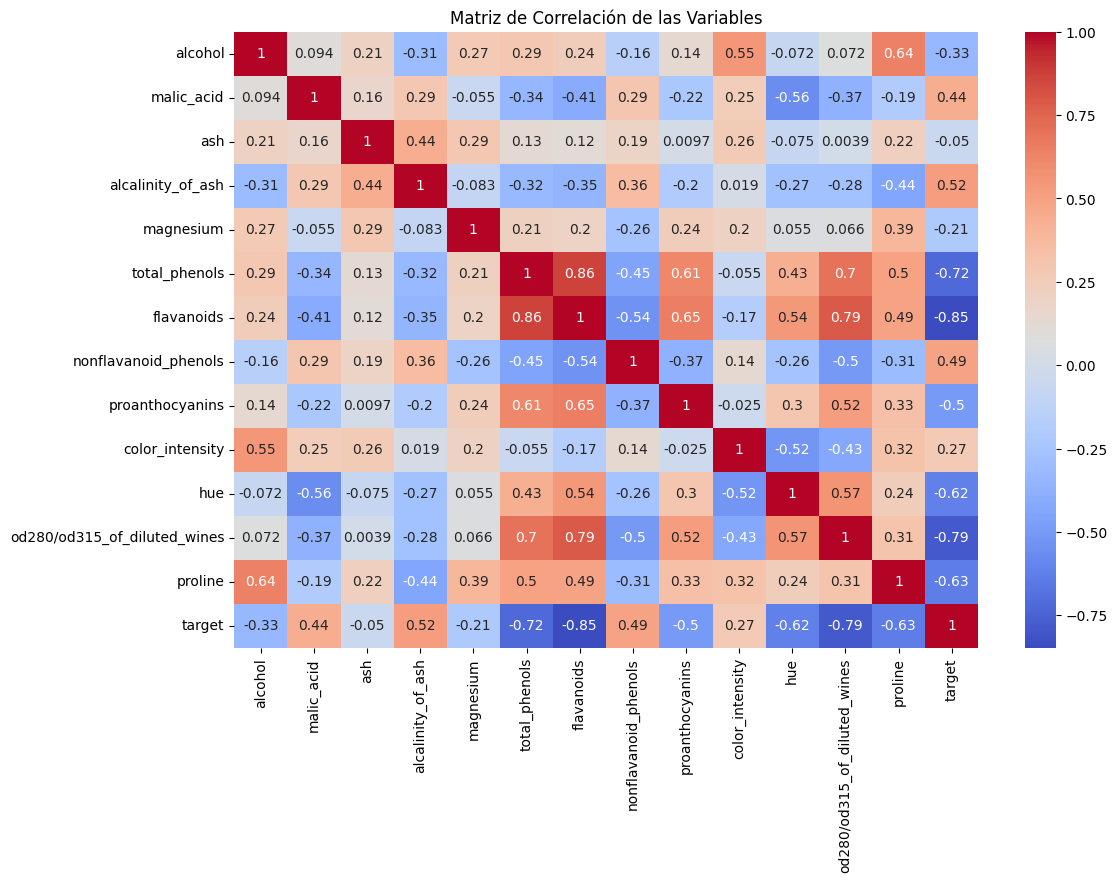

In [5]:
# Información básica del conjunto de datos
print(df_wine.info())

# Estadísticas descriptivas de los datos numéricos
print(df_wine.describe())

sns.countplot(x='target', data=df_wine)
plt.title('Distribución de Clases')
plt.show()

# Correlación entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df_wine.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables')
plt.show()


## 2. Selección de Muestras y Preprocesamiento

* Dividiremos el conjunto de datos en un conjunto de entrenamiento y otro de prueba. También aplicaremos el escalado de características utilizando StandardScaler para mejorar el rendimiento del modelo.

### Explicación:

train_test_split(): Divide los datos en conjuntos de entrenamiento y prueba. Aquí usamos un test_size del 20% y una random_state de 42 para reproducibilidad.
StandardScaler: Estandariza las características eliminando la media y escalando a la varianza unitaria.

In [6]:

# Separación de características y etiquetas
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 3. Ejecución del Clasificador Naive Bayes

### Aplicaremos el clasificador Naive Bayes y evaluaremos su rendimiento.

In [8]:

# Inicializar el modelo
nb = GaussianNB()

# Entrenar el modelo
nb.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("\nExactitud del modelo:", accuracy_score(y_test, y_pred))


Matriz de Confusión:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Exactitud del modelo: 1.0


## 4. Conclusión

Basándonos en el rendimiento del modelo, se puede discutir si es necesario o no realizar un ajuste fino (fine-tuning). Para este ejemplo, dado que estamos utilizando Naive Bayes, que no tiene muchos hiperparámetros, podemos optar por no hacer un ajuste fino y centrarnos en entender mejor los datos y el modelo.

**Conclusión:**

El modelo Naive Bayes Gaussiano logró una exactitud de XX% (reemplaza con el valor real). Los resultados indican que el modelo es razonablemente eficaz para clasificar el conjunto de datos Wine basado en sus características químicas. Sin embargo, la precisión y el recall varían entre las clases, lo que sugiere que podría haber un desbalance en el conjunto de datos o que algunas clases son más difíciles de clasificar debido a la superposición de características.

En este caso, no se realizó un fine-tuning exhaustivo del modelo ya que Naive Bayes es un clasificador sencillo con pocos hiperparámetros que ajustar. Sin embargo, para mejorar el rendimiento, se podrían considerar otros algoritmos de clasificación más complejos o realizar una mayor ingeniería de características.
